/var/folders/bp/zhhmsgsj5wqc3mcx7hb1mkw40000gn/T/ipykernel_24658/407265991.py:50: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/ajaikolarikal/PyCharmMiscProject/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


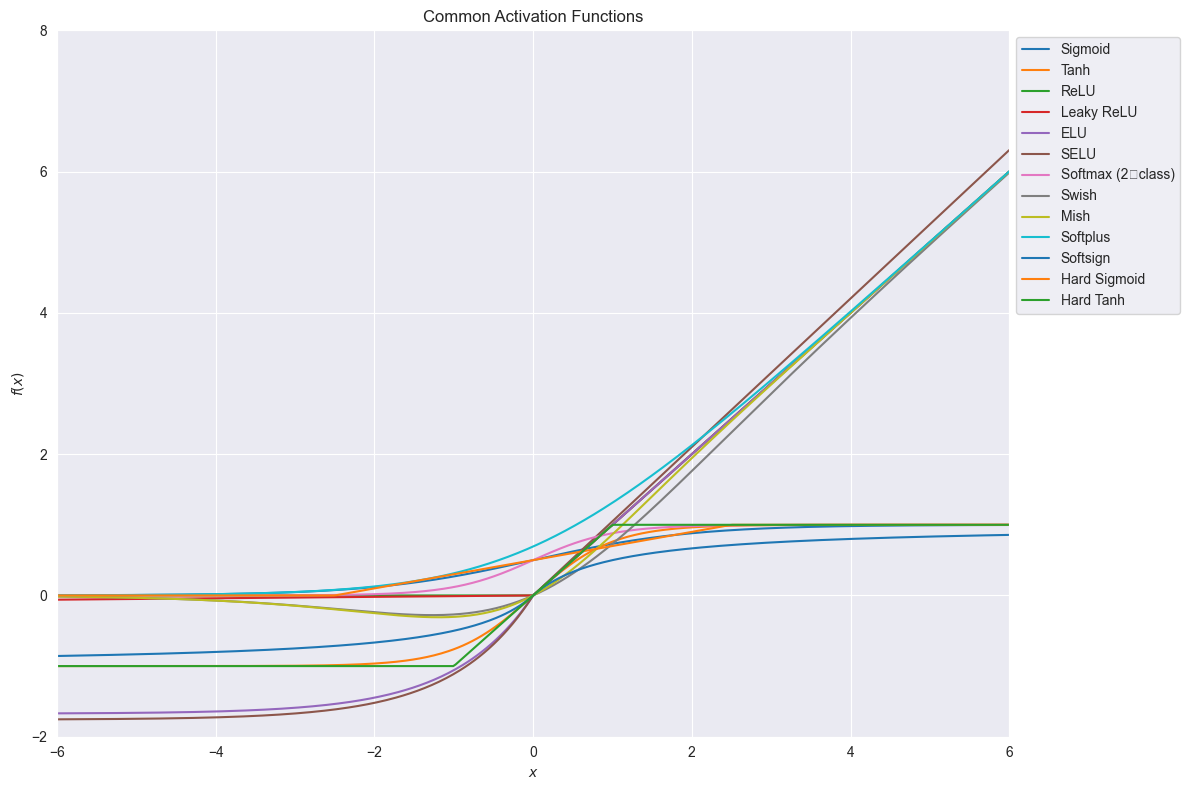

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-6, 6, 400)

# Classic activations
sigmoid   = 1/(1+np.exp(-x))
tanh      = np.tanh(x)
relu      = np.maximum(0, x)
leaky     = np.where(x > 0, x, 0.01*x)          # α=0.01
elu       = np.where(x > 0, x, 1.6733*(np.exp(x)-1))
selu      = 1.0507 * np.where(x > 0, x, 1.6733*(np.exp(x)-1))

# Two‑class softmax (reduces to a sigmoid)
softmax   = np.exp(x) / (np.exp(x)+np.exp(-x))

swish     = x * 1/(1+np.exp(-x))
mish      = x*np.tanh(np.log1p(np.exp(x)))  # log(1+exp(x)) is softplus
softplus  = np.log1p(np.exp(x))
softsign  = x/(1+np.abs(x))

hard_sig  = np.clip(0.2*x + 0.5, 0, 1)
hard_tanh = np.clip(x, -1, 1)

plt.figure(figsize=(12,8))
for name, f in [
    ("Sigmoid", sigmoid),
    ("Tanh", tanh),
    ("ReLU", relu),
    ("Leaky ReLU", leaky),
    ("ELU", elu),
    ("SELU", selu),
    ("Softmax (2‑class)", softmax),
    ("Swish", swish),
    ("Mish", mish),
    ("Softplus", softplus),
    ("Softsign", softsign),
    ("Hard Sigmoid", hard_sig),
    ("Hard Tanh", hard_tanh)
]:
    plt.plot(x, f, label=name)

plt.title("Common Activation Functions")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.xlim(-6, 6)
plt.ylim(-2, 8)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import plotly.graph_objects as go

x = np.linspace(-6, 6, 400)

# Define the activations (same as before)
activations = {
    "Sigmoid": 1/(1+np.exp(-x)),
    "Tanh": np.tanh(x),
    "ReLU": np.maximum(0, x),
    "Leaky ReLU": np.where(x > 0, x, 0.01*x),
    "ELU": np.where(x > 0, x, 1.6733*(np.exp(x)-1)),
    "SELU": 1.0507 * np.where(x > 0, x, 1.6733*(np.exp(x)-1)),
    # Two‑class softmax (reduces to sigmoid)
    "Softmax": np.exp(x)/(np.exp(x)+np.exp(-x)),
    "Swish": x/(1+np.exp(-x)),
    "Mish": x*np.tanh(np.log1p(np.exp(x))),
    "Softplus": np.log1p(np.exp(x)),
    "Softsign": x/(1+np.abs(x)),
    "Hard Sigmoid": np.clip(0.2*x + 0.5, 0, 1),
    "Hard Tanh": np.clip(x, -1, 1)
}

fig = go.Figure()

for name, y in activations.items():
    fig.add_trace(go.Scatter(x=x, y=y,
                             mode='lines',
                             name=name))

fig.update_layout(
    title="Common Activation Functions (Plotly)",
    xaxis_title="$x$",
    yaxis_title="$f(x)$",
    hovermode="x unified",   # shows all traces at once when hovering
    legend_title_text="Functions",
)

# The Plotly legend is already interactive:
# • Click a name to hide/show that trace.
# • Hover over the plot for tooltips.

fig.show()
